In [21]:
# Biblioteca científica
import numpy as np
# Biblioteca para análise de dados
import pandas as pd
# Suprimindo os warnings da biblioteca pandas
pd.options.mode.chained_assignment = None
# Bibliotecas de visualização de dados
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [22]:
resultados_enade_tudo = pd.read_csv('ENADE2017/dados/resultados_conceito_enade_2017.csv')

In [23]:
cursos_enade_filtrado = resultados_enade_tudo.filter(['Código do Curso', 'Conceito Enade (Faixa)'])
cursos_enade_filtrado = cursos_enade_filtrado.rename(columns={'Código do Curso': 'CO_CURSO', 'Conceito Enade (Faixa)': 'CONCEITO_ENADE'}, errors='raise')
cursos_enade_filtrado = cursos_enade_filtrado[cursos_enade_filtrado['CONCEITO_ENADE'] != 'SC']
cursos_enade_filtrado = cursos_enade_filtrado.reset_index().filter(['CO_CURSO', 'CONCEITO_ENADE'])
cursos_enade_filtrado.head()

,CO_CURSO,CONCEITO_ENADE
0,44,5
1,132,5
2,1138293,4
3,99444,4
4,122640,4


In [24]:
enade_cc_brasil = pd.read_csv('ENADE2017/dados/enade2017_computacao_brasil.csv', low_memory=False)
enade_cc_brasil_filtrado = enade_cc_brasil.filter(['CO_CURSO', 'QE_I08'])
enade_cc_brasil_filtrado['QE_I08'] = enade_cc_brasil_filtrado['QE_I08'].astype(str)
enade_cc_brasil_filtrado = enade_cc_brasil_filtrado[enade_cc_brasil_filtrado['QE_I08'] != 'nan'].reset_index().filter(['CO_CURSO', 'QE_I08'])
enade_cc_brasil_filtrado.head()

,CO_CURSO,QE_I08
0,36,E
1,36,C
2,36,C
3,36,B
4,36,B


In [25]:
enade_renda = pd.merge(enade_cc_brasil_filtrado, cursos_enade_filtrado, how='inner', left_on='CO_CURSO', right_on='CO_CURSO')
enade_renda = enade_renda.rename(columns={'QE_I08': 'RENDA'}, errors='raise')
enade_renda.head()

,CO_CURSO,RENDA,CONCEITO_ENADE
0,36,E,3
1,36,C,3
2,36,C,3
3,36,B,3
4,36,B,3


In [26]:
conceito3 = ['3']
enade_renda_filtrado_conceito3 = enade_renda[enade_renda['CONCEITO_ENADE'].isin(conceito3)].reset_index().filter(['RENDA', 'CONCEITO_ENADE'])
enade_renda_filtrado_conceito3

,RENDA,CONCEITO_ENADE
0,E,3
1,C,3
2,C,3
3,B,3
4,B,3
...,...,...
2460,C,3
2461,D,3
2462,A,3
2463,C,3


In [27]:
conceito5 = ['5']
# resultados_enade_ies_tudo = resultados_enade_tudo[resultados_enade_tudo['Sigla da IES'].isin(siglas_ies)]
enade_renda_filtrado_conceito5 = enade_renda[enade_renda['CONCEITO_ENADE'].isin(conceito5)].reset_index().filter(['RENDA', 'CONCEITO_ENADE'])
enade_renda_filtrado_conceito5

,RENDA,CONCEITO_ENADE
0,B,5
1,C,5
2,B,5
3,B,5
4,F,5
...,...,...
1260,F,5
1261,B,5
1262,A,5
1263,B,5


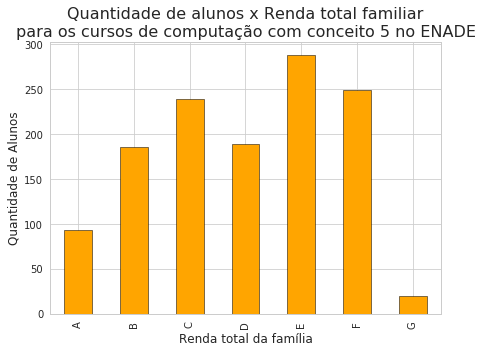

In [28]:
fig, gph = plt.subplots(figsize=(7,5))
gph = enade_renda_filtrado_conceito5['RENDA'].value_counts().sort_index().plot(kind='bar', color='orange', edgecolor='black')
gph.set_title('Quantidade de alunos x Renda total familiar\npara os cursos de computação com conceito 5 no ENADE', fontsize=16)
plt.xlabel('Renda total da família')
plt.ylabel('Quantidade de Alunos')
plt.show()

In [30]:
array_1 = enade_renda_filtrado_conceito3['RENDA'].value_counts().sort_index().values
array_2 = enade_renda_filtrado_conceito5['RENDA'].value_counts().sort_index().values

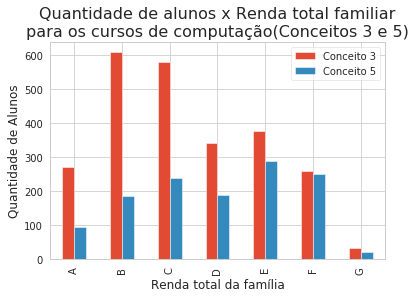

In [48]:
labels=['A', 'B', 'C', 'D', 'E', 'F', 'G']
df = pd.DataFrame({'Conceito 3': array_1, 'Conceito 5': array_2}, index=labels)

gph = df.plot(kind='bar')
gph.set_title('Quantidade de alunos x Renda total familiar\npara os cursos de computação(Conceitos 3 e 5)', fontsize=16)
plt.xlabel('Renda total da família')
plt.ylabel('Quantidade de Alunos')
plt.show()

In [49]:
labels=['A', 'B', 'C', 'D', 'E', 'F', 'G']
df2 = pd.DataFrame({'Conceito3': array_1, 'Conceito5': array_2}, index=labels)
df2 = (100. * df / df.sum()).round(0)
df2

,Conceito 3,Conceito 5
A,11.0,7.0
B,25.0,15.0
C,23.0,19.0
D,14.0,15.0
E,15.0,23.0
F,11.0,20.0
G,1.0,2.0


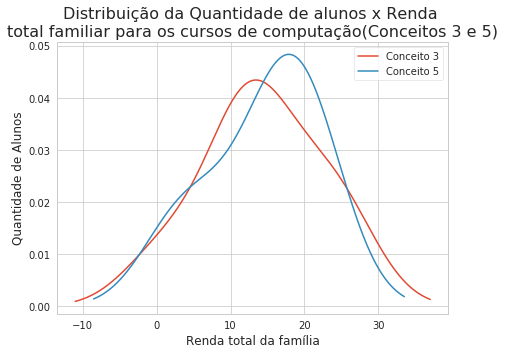

In [50]:
gph = df2.plot(kind='density', figsize=(7,5))
gph.set_title('Distribuição da Quantidade de alunos x Renda \ntotal familiar para os cursos de computação(Conceitos 3 e 5)', fontsize=16)
plt.xlabel('Renda total da família')
plt.ylabel('Quantidade de Alunos')
plt.show()

NameError: name 'enade_renda_filtrado' is not defined

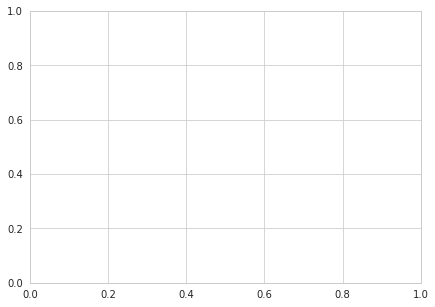

In [32]:
fig, gph = plt.subplots(figsize=(7,5))
gph = enade_renda_filtrado['RENDA'].value_counts().sort_index().plot(kind='bar', color='lightgreen', edgecolor='black')
gph.set_title('Quantidade de alunos x Renda total familiar para os\ncursos de computação com conceito entre 3 e 5 no ENADE', fontsize=16)
plt.xlabel('Renda total da família')
plt.ylabel('Quantidade de Alunos')
plt.show()

In [ ]:
fig, gph = plt.subplots(figsize=(7,5))
gph = enade_renda_filtrado['RENDA'].value_counts().sort_index().plot(kind='density', color='green')
gph.set_title('Quantidade de alunos x Renda total familiar para os\ncursos de computação com conceito entre 3 e 5 no ENADE', fontsize=16)
plt.xlabel('Renda total da família')
plt.ylabel('Quantidade de Alunos')
plt.show()
